
[gamestop_product_reviews_dataset_sample](https://www.kaggle.com/datasets/thedevastator/gamestop-customer-reviews-dataset), 

# Data Cleaninig

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

In [2]:
reviews_df = pd.read_csv('./data/raw/reviews.csv', sep=',',decimal=',')
reviews_df.head(2)

,index,url,name,brand,sku,reviewer_name,review_title,review_description,recommended_review,verifed_purchaser,...,not_helpful_count,reviewed_at,images,rating,average_rating,reviews_count,reviews_link,comment_id,uniq_id,scraped_at
0,0,https://www.gamestop.com/electronics/tvs-monit...,VIZIO 55-in Class OLED 4K HDR Smart TV OLED55-H1,VIZIO,328244,Leeford,NaN,My new OLED is a upgrade and it's great! This...,yes: I recommend this product,NaN,...,0,10 months ago,NaN,5.0,4.2727,363,https://www.gamestop.com/on/demandware.store/S...,229196240,d749678d-aeba-5a6b-b8e2-8d2121463672,16/01/2022 16:17:56
1,1,https://www.gamestop.com/electronics/tvs-monit...,VIZIO 55-in Class OLED 4K HDR Smart TV OLED55-H1,VIZIO,328244,DJM7,Great looking screen!,Rating is really a 4.5 but that's unavailable....,yes: I recommend this product,NaN,...,0,10 months ago,NaN,4.0,4.2727,363,https://www.gamestop.com/on/demandware.store/S...,229179703,9f20312c-1047-5824-97d2-d5563b8fd046,16/01/2022 16:17:56


### ¿Qué tipo de dato son las variables y cuantos son en el dataset?

In [3]:
reviews_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4686 entries, 0 to 4685
Data columns (total 21 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   index               4686 non-null   int64 
 1   url                 4686 non-null   object
 2   name                4686 non-null   object
 3   brand               4686 non-null   object
 4   sku                 4686 non-null   int64 
 5   reviewer_name       4686 non-null   object
 6   review_title        4621 non-null   object
 7   review_description  4686 non-null   object
 8   recommended_review  4686 non-null   object
 9   verifed_purchaser   2406 non-null   object
 10  helpful_count       4686 non-null   int64 
 11  not_helpful_count   4686 non-null   int64 
 12  reviewed_at         4686 non-null   object
 13  images              166 non-null    object
 14  rating              4686 non-null   object
 15  average_rating      4686 non-null   object
 16  reviews_count       4686

### ¿Cuántas variables de cada tipo de dato tenemos en el dataset?

In [4]:
reviews_df.dtypes.value_counts()

object    15
int64      6
Name: count, dtype: int64

### ¿Cuántas variables y observaciones tenemos en el dataset?

In [5]:
print(reviews_df.shape)

# Cuantos datos tenemos en el dataset
print(reviews_df.size)

(4686, 21)
98406


In [6]:
columns_df  = reviews_df.columns
print(columns_df)

Index(['index', 'url', 'name', 'brand', 'sku', 'reviewer_name', 'review_title',
       'review_description', 'recommended_review', 'verifed_purchaser',
       'helpful_count', 'not_helpful_count', 'reviewed_at', 'images', 'rating',
       'average_rating', 'reviews_count', 'reviews_link', 'comment_id',
       'uniq_id', 'scraped_at'],
      dtype='object')


## Analizar values únicos por columna

In [7]:
for i in columns_df:
    print('\n',f'<= {i}: => ',reviews_df[i].unique())


 <= index: =>  [   0    1    2 ... 4683 4684 4685]

 <= url: =>  ['https://www.gamestop.com/electronics/tvs-monitors/televisions/products/vizio-55-in-class-oled-4k-hdr-smart-tv-oled55-h1/11180293.html'
 'https://www.gamestop.com/gaming-accessories/controllers/xbox-series-x%7Cs/products/microsoft-xbox-elite-series-2-wireless-controller-for-xbox-series-x-halo-infinite/11157418.html'
 'https://www.gamestop.com/video-games/nintendo-switch/products/yoshis-crafted-world---nintendo-switch/10161220.html'
 'https://www.gamestop.com/video-games/pc-games/products/supreme-commander-2/10075055.html'
 'https://www.gamestop.com/video-games/playstation-4/products/kung-fu-panda-showdown-of-legendary-legends---playstation-4/10122327.html'
 'https://www.gamestop.com/gaming-accessories/controllers/nintendo-switch/products/powera-enhanced-wireless-controller-for-nintendo-switch-link-gold/11111433.html'
 'https://www.gamestop.com/video-games/playstation-4/products/wrc-8-fia-world-rally-championship---plays

## Analizar Cantidad de values únicos por columna (no. de categorias)

In [8]:
for i in columns_df:
    print('\n',f'{i}: => ',reviews_df[i].nunique())


 index: =>  4686

 url: =>  124

 name: =>  124

 brand: =>  70

 sku: =>  124

 reviewer_name: =>  4452

 review_title: =>  3831

 review_description: =>  4684

 recommended_review: =>  2

 verifed_purchaser: =>  1

 helpful_count: =>  38

 not_helpful_count: =>  45

 reviewed_at: =>  57

 images: =>  166

 rating: =>  5

 average_rating: =>  92

 reviews_count: =>  72

 reviews_link: =>  543

 comment_id: =>  4686

 uniq_id: =>  4686

 scraped_at: =>  95


### Columnas que debo quitar:

 - images              166 non-null    object

In [9]:
reviews_df.drop(columns='images', inplace=True)

In [10]:
print(reviews_df.shape)
print(reviews_df.size)

(4686, 20)
93720


### ¿Cuál es la proporción de valores nulos por cada variable?

C:\Users\andre\.conda\envs\m3_env\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


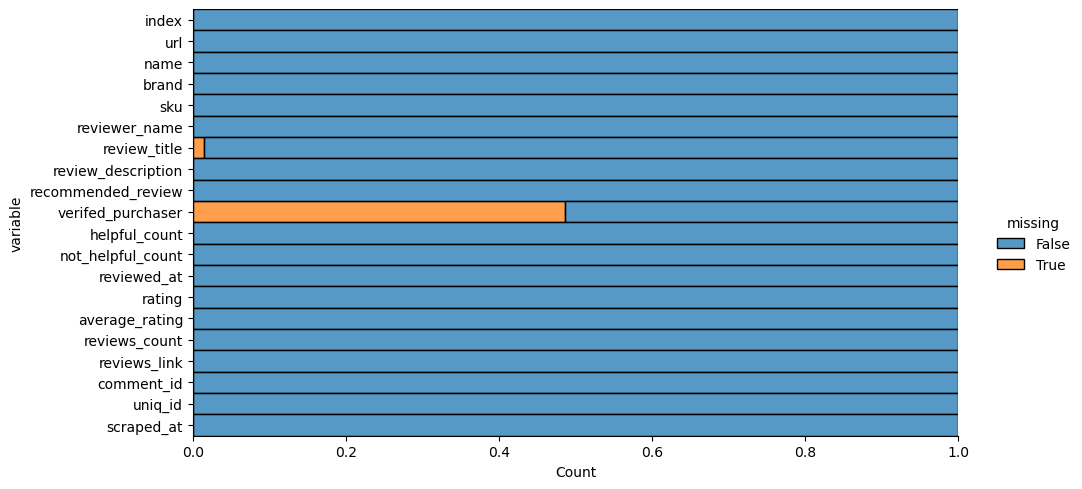

In [11]:
reviews_df.isnull().melt(value_name='missing').pipe(
    lambda df: (
        sns.displot(
            data=df,
            y='variable',
            hue='missing',
            multiple='fill',
            aspect=2
        )
    )
)

In [12]:
reviews_df['verifed_purchaser'].unique()

array([nan, 'Verified Purchaser'], dtype=object)

In [13]:
# https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.replace.html

reviews_df['verifed_purchaser'].replace({'Verified Purchaser': 'Yes',np.nan:'No'},inplace=True)

C:\Users\andre\.conda\envs\m3_env\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


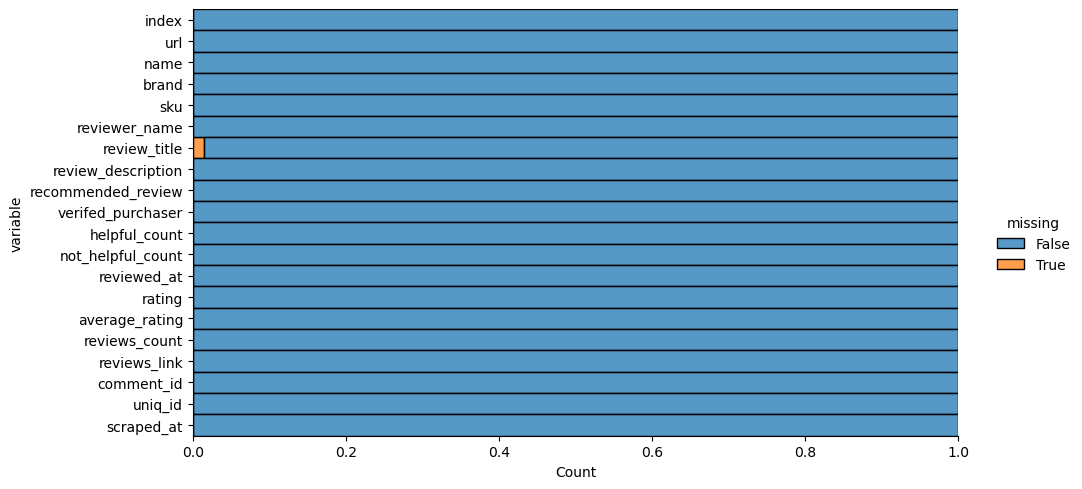

In [14]:
reviews_df.isnull().melt(value_name='missing').pipe(
    lambda df: (
        sns.displot(
            data=df,
            y='variable',
            hue='missing',
            multiple='fill',
            aspect=2
        )
    )
)

In [15]:
print(reviews_df['review_title'].unique())
print(reviews_df['review_title'].nunique())

[nan 'Great looking screen!' 'Quality' ...
 'You Should Race to get This Game' 'First time Forza owner'
 'I give it a 9 out of ten. Best racer out there']
3831


In [16]:
null_review_title_df = reviews_df[reviews_df['review_title'].isnull()]
null_review_title_df.head(2)

,index,url,name,brand,sku,reviewer_name,review_title,review_description,recommended_review,verifed_purchaser,helpful_count,not_helpful_count,reviewed_at,rating,average_rating,reviews_count,reviews_link,comment_id,uniq_id,scraped_at
0,0,https://www.gamestop.com/electronics/tvs-monit...,VIZIO 55-in Class OLED 4K HDR Smart TV OLED55-H1,VIZIO,328244,Leeford,NaN,My new OLED is a upgrade and it's great! This...,yes: I recommend this product,No,0,0,10 months ago,5.0,4.2727,363,https://www.gamestop.com/on/demandware.store/S...,229196240,d749678d-aeba-5a6b-b8e2-8d2121463672,16/01/2022 16:17:56
257,257,https://www.gamestop.com/electronics/tvs-monit...,VIZIO 55-in Class OLED 4K HDR Smart TV OLED55-H1,VIZIO,328244,Joséviera264,NaN,The best “American product 100% costumer satis...,yes: I recommend this product,No,0,0,1 year ago,5.0,4.2727,363,https://www.gamestop.com/on/demandware.store/S...,227469318,fe663898-37db-56ab-9d32-c3d52f93b4e5,16/01/2022 16:18:01


In [17]:
null_review_title_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 65 entries, 0 to 4482
Data columns (total 20 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   index               65 non-null     int64 
 1   url                 65 non-null     object
 2   name                65 non-null     object
 3   brand               65 non-null     object
 4   sku                 65 non-null     int64 
 5   reviewer_name       65 non-null     object
 6   review_title        0 non-null      object
 7   review_description  65 non-null     object
 8   recommended_review  65 non-null     object
 9   verifed_purchaser   65 non-null     object
 10  helpful_count       65 non-null     int64 
 11  not_helpful_count   65 non-null     int64 
 12  reviewed_at         65 non-null     object
 13  rating              65 non-null     object
 14  average_rating      65 non-null     object
 15  reviews_count       65 non-null     int64 
 16  reviews_link        65 non-null

In [18]:
reviews_df['review_title'].replace(np.nan,'Untitled Review',inplace=True)

C:\Users\andre\.conda\envs\m3_env\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


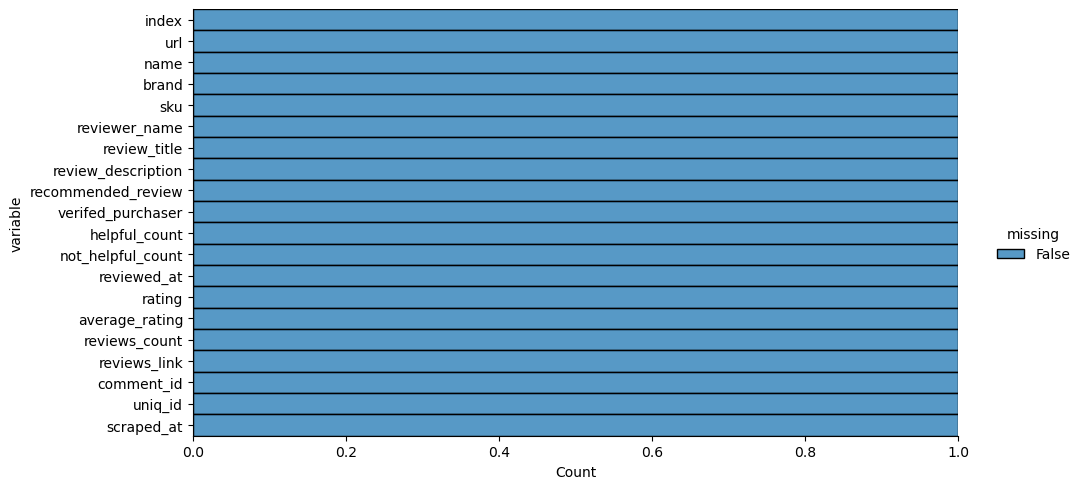

In [19]:
reviews_df.isnull().melt(value_name='missing').pipe(
    lambda df: (
        sns.displot(
            data=df,
            y='variable',
            hue='missing',
            multiple='fill',
            aspect=2
        )
    )
)

### ¿Cuántos valores nulos tenemos en total en el conjunto de datos?

In [20]:
reviews_df.isnull().sum().sum()

0

### ¿Cuántos valores duplicados tenemos?

In [21]:
reviews_df['recommended_review'].unique()

array(['yes: I recommend this product',
       'No: I don’t recommend this product'], dtype=object)

In [22]:
# Status de review para positivo=1 y negativo=0
reviews_df['review_status'] = reviews_df['recommended_review'].apply(
    lambda x: 1 if x == 'yes: I recommend this product' else 0)
reviews_df.drop(columns='recommended_review', inplace=True)

In [23]:
print(reviews_df.shape)
print(reviews_df.size)

(4686, 20)
93720


# Creando un nuevo dataframe, partiendo de la columna 'url'

In [24]:
url_df = reviews_df[['index','url','sku']]
url_df.head()

,index,url,sku
0,0,https://www.gamestop.com/electronics/tvs-monit...,328244
1,1,https://www.gamestop.com/electronics/tvs-monit...,328244
2,2,https://www.gamestop.com/electronics/tvs-monit...,328244
3,3,https://www.gamestop.com/electronics/tvs-monit...,328244
4,4,https://www.gamestop.com/electronics/tvs-monit...,328244


In [25]:
import re
url_df['url'] = url_df['url'].str.lower()

C:\Users\andre\AppData\Local\Temp\ipykernel_18944\4292896123.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  url_df['url'] = url_df['url'].str.lower()


In [26]:
myString = url_df['url'][0]
print(myString)
myList = myString.partition('https://www.gamestop.com/')

print(myList)

https://www.gamestop.com/electronics/tvs-monitors/televisions/products/vizio-55-in-class-oled-4k-hdr-smart-tv-oled55-h1/11180293.html
('', 'https://www.gamestop.com/', 'electronics/tvs-monitors/televisions/products/vizio-55-in-class-oled-4k-hdr-smart-tv-oled55-h1/11180293.html')


In [27]:
prefix = 'https://www.gamestop.com/'

In [28]:
def prefix_suffix_remover(url):
    # Remove prefix from the string
    if url.startswith(prefix):
        removed_prefix = url[len(prefix):]
    
    # Remove suffix matching the pattern
    removed_prefix_suffix = re.sub(r'/products|\d{8}\.html$', '', removed_prefix)
#     removed_prefix_suffix = re.sub(r'/\d{8}\.html$', '', removed_prefix)
    
    return removed_prefix_suffix

In [29]:
url_df['prod_category'] = url_df['url'].apply(prefix_suffix_remover)

C:\Users\andre\AppData\Local\Temp\ipykernel_18944\2839873458.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  url_df['prod_category'] = url_df['url'].apply(prefix_suffix_remover)


In [30]:
url_df.head()

,index,url,sku,prod_category
0,0,https://www.gamestop.com/electronics/tvs-monit...,328244,electronics/tvs-monitors/televisions/vizio-55-...
1,1,https://www.gamestop.com/electronics/tvs-monit...,328244,electronics/tvs-monitors/televisions/vizio-55-...
2,2,https://www.gamestop.com/electronics/tvs-monit...,328244,electronics/tvs-monitors/televisions/vizio-55-...
3,3,https://www.gamestop.com/electronics/tvs-monit...,328244,electronics/tvs-monitors/televisions/vizio-55-...
4,4,https://www.gamestop.com/electronics/tvs-monit...,328244,electronics/tvs-monitors/televisions/vizio-55-...


In [31]:
# Función para extraer antes y después del tercer '/'
def extract_categories(url):
    parts = url.split('/', 3)
    if len(parts) >= 4:
        before_third_slash = parts[0] + '/' + parts[1] + '/' + parts[2]
        after_third_slash = parts[3].split('.')[0]  # Remove '.html' part
    else:
        before_third_slash = url
        after_third_slash = ''
    return before_third_slash, after_third_slash

In [32]:
url_df['category_before_third'], url_df['category_after_third'] = zip(*url_df['prod_category'].apply(extract_categories))

C:\Users\andre\AppData\Local\Temp\ipykernel_18944\4111881370.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  url_df['category_before_third'], url_df['category_after_third'] = zip(*url_df['prod_category'].apply(extract_categories))
C:\Users\andre\AppData\Local\Temp\ipykernel_18944\4111881370.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  url_df['category_before_third'], url_df['category_after_third'] = zip(*url_df['prod_category'].apply(extract_categories))


In [33]:
url_df.head()

,index,url,sku,prod_category,category_before_third,category_after_third
0,0,https://www.gamestop.com/electronics/tvs-monit...,328244,electronics/tvs-monitors/televisions/vizio-55-...,electronics/tvs-monitors/televisions,vizio-55-in-class-oled-4k-hdr-smart-tv-oled55-h1/
1,1,https://www.gamestop.com/electronics/tvs-monit...,328244,electronics/tvs-monitors/televisions/vizio-55-...,electronics/tvs-monitors/televisions,vizio-55-in-class-oled-4k-hdr-smart-tv-oled55-h1/
2,2,https://www.gamestop.com/electronics/tvs-monit...,328244,electronics/tvs-monitors/televisions/vizio-55-...,electronics/tvs-monitors/televisions,vizio-55-in-class-oled-4k-hdr-smart-tv-oled55-h1/
3,3,https://www.gamestop.com/electronics/tvs-monit...,328244,electronics/tvs-monitors/televisions/vizio-55-...,electronics/tvs-monitors/televisions,vizio-55-in-class-oled-4k-hdr-smart-tv-oled55-h1/
4,4,https://www.gamestop.com/electronics/tvs-monit...,328244,electronics/tvs-monitors/televisions/vizio-55-...,electronics/tvs-monitors/televisions,vizio-55-in-class-oled-4k-hdr-smart-tv-oled55-h1/


In [34]:
url_df['prod_category'][0]

'electronics/tvs-monitors/televisions/vizio-55-in-class-oled-4k-hdr-smart-tv-oled55-h1/'

In [35]:
# Función para extraer el primer string antes del primer '/'
def extract_first_category(url):
    return url.split('/')[0]

# Aplicar la función al DataFrame y crear una nueva columna
url_df['prod_category'] = url_df['prod_category'].apply(extract_first_category)

# Verificar el resultado
url_df.head()

C:\Users\andre\AppData\Local\Temp\ipykernel_18944\2457201289.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  url_df['prod_category'] = url_df['prod_category'].apply(extract_first_category)


,index,url,sku,prod_category,category_before_third,category_after_third
0,0,https://www.gamestop.com/electronics/tvs-monit...,328244,electronics,electronics/tvs-monitors/televisions,vizio-55-in-class-oled-4k-hdr-smart-tv-oled55-h1/
1,1,https://www.gamestop.com/electronics/tvs-monit...,328244,electronics,electronics/tvs-monitors/televisions,vizio-55-in-class-oled-4k-hdr-smart-tv-oled55-h1/
2,2,https://www.gamestop.com/electronics/tvs-monit...,328244,electronics,electronics/tvs-monitors/televisions,vizio-55-in-class-oled-4k-hdr-smart-tv-oled55-h1/
3,3,https://www.gamestop.com/electronics/tvs-monit...,328244,electronics,electronics/tvs-monitors/televisions,vizio-55-in-class-oled-4k-hdr-smart-tv-oled55-h1/
4,4,https://www.gamestop.com/electronics/tvs-monit...,328244,electronics,electronics/tvs-monitors/televisions,vizio-55-in-class-oled-4k-hdr-smart-tv-oled55-h1/


In [36]:
# Función para extraer el primer string antes del primer '/'
def extract_second_category(url):
    return url.split('/')[1]

# Aplicar la función al DataFrame y crear una nueva columna
url_df['prod_subcategory'] = url_df['category_before_third'].apply(extract_second_category)

# Verificar el resultado
url_df.head()

C:\Users\andre\AppData\Local\Temp\ipykernel_18944\359986395.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  url_df['prod_subcategory'] = url_df['category_before_third'].apply(extract_second_category)


,index,url,sku,prod_category,category_before_third,category_after_third,prod_subcategory
0,0,https://www.gamestop.com/electronics/tvs-monit...,328244,electronics,electronics/tvs-monitors/televisions,vizio-55-in-class-oled-4k-hdr-smart-tv-oled55-h1/,tvs-monitors
1,1,https://www.gamestop.com/electronics/tvs-monit...,328244,electronics,electronics/tvs-monitors/televisions,vizio-55-in-class-oled-4k-hdr-smart-tv-oled55-h1/,tvs-monitors
2,2,https://www.gamestop.com/electronics/tvs-monit...,328244,electronics,electronics/tvs-monitors/televisions,vizio-55-in-class-oled-4k-hdr-smart-tv-oled55-h1/,tvs-monitors
3,3,https://www.gamestop.com/electronics/tvs-monit...,328244,electronics,electronics/tvs-monitors/televisions,vizio-55-in-class-oled-4k-hdr-smart-tv-oled55-h1/,tvs-monitors
4,4,https://www.gamestop.com/electronics/tvs-monit...,328244,electronics,electronics/tvs-monitors/televisions,vizio-55-in-class-oled-4k-hdr-smart-tv-oled55-h1/,tvs-monitors


In [37]:
# Función para extraer el primer string antes del primer '/'
def extract_second_category(url):
    return url.split('/')[2]

# Aplicar la función al DataFrame y crear una nueva columna
url_df['prod_type'] = url_df['category_before_third'].apply(extract_second_category)

# Verificar el resultado
url_df.head()

C:\Users\andre\AppData\Local\Temp\ipykernel_18944\3682881556.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  url_df['prod_type'] = url_df['category_before_third'].apply(extract_second_category)


,index,url,sku,prod_category,category_before_third,category_after_third,prod_subcategory,prod_type
0,0,https://www.gamestop.com/electronics/tvs-monit...,328244,electronics,electronics/tvs-monitors/televisions,vizio-55-in-class-oled-4k-hdr-smart-tv-oled55-h1/,tvs-monitors,televisions
1,1,https://www.gamestop.com/electronics/tvs-monit...,328244,electronics,electronics/tvs-monitors/televisions,vizio-55-in-class-oled-4k-hdr-smart-tv-oled55-h1/,tvs-monitors,televisions
2,2,https://www.gamestop.com/electronics/tvs-monit...,328244,electronics,electronics/tvs-monitors/televisions,vizio-55-in-class-oled-4k-hdr-smart-tv-oled55-h1/,tvs-monitors,televisions
3,3,https://www.gamestop.com/electronics/tvs-monit...,328244,electronics,electronics/tvs-monitors/televisions,vizio-55-in-class-oled-4k-hdr-smart-tv-oled55-h1/,tvs-monitors,televisions
4,4,https://www.gamestop.com/electronics/tvs-monit...,328244,electronics,electronics/tvs-monitors/televisions,vizio-55-in-class-oled-4k-hdr-smart-tv-oled55-h1/,tvs-monitors,televisions


# CONCAT

In [38]:
merged_df = pd.merge(reviews_df, url_df, on=['index', 'url', 'sku'])

In [39]:
merged_df.head(2)

,index,url,name,brand,sku,reviewer_name,review_title,review_description,verifed_purchaser,helpful_count,...,reviews_link,comment_id,uniq_id,scraped_at,review_status,prod_category,category_before_third,category_after_third,prod_subcategory,prod_type
0,0,https://www.gamestop.com/electronics/tvs-monit...,VIZIO 55-in Class OLED 4K HDR Smart TV OLED55-H1,VIZIO,328244,Leeford,Untitled Review,My new OLED is a upgrade and it's great! This...,No,0,...,https://www.gamestop.com/on/demandware.store/S...,229196240,d749678d-aeba-5a6b-b8e2-8d2121463672,16/01/2022 16:17:56,1,electronics,electronics/tvs-monitors/televisions,vizio-55-in-class-oled-4k-hdr-smart-tv-oled55-h1/,tvs-monitors,televisions
1,1,https://www.gamestop.com/electronics/tvs-monit...,VIZIO 55-in Class OLED 4K HDR Smart TV OLED55-H1,VIZIO,328244,DJM7,Great looking screen!,Rating is really a 4.5 but that's unavailable....,No,0,...,https://www.gamestop.com/on/demandware.store/S...,229179703,9f20312c-1047-5824-97d2-d5563b8fd046,16/01/2022 16:17:56,1,electronics,electronics/tvs-monitors/televisions,vizio-55-in-class-oled-4k-hdr-smart-tv-oled55-h1/,tvs-monitors,televisions


In [40]:
merged_df.columns

Index(['index', 'url', 'name', 'brand', 'sku', 'reviewer_name', 'review_title',
       'review_description', 'verifed_purchaser', 'helpful_count',
       'not_helpful_count', 'reviewed_at', 'rating', 'average_rating',
       'reviews_count', 'reviews_link', 'comment_id', 'uniq_id', 'scraped_at',
       'review_status', 'prod_category', 'category_before_third',
       'category_after_third', 'prod_subcategory', 'prod_type'],
      dtype='object')

In [41]:
reviews_df = merged_df.copy()

In [42]:
pd.set_option('display.max_columns', None)
reviews_df.head(2)

,index,url,name,brand,sku,reviewer_name,review_title,review_description,verifed_purchaser,helpful_count,not_helpful_count,reviewed_at,rating,average_rating,reviews_count,reviews_link,comment_id,uniq_id,scraped_at,review_status,prod_category,category_before_third,category_after_third,prod_subcategory,prod_type
0,0,https://www.gamestop.com/electronics/tvs-monit...,VIZIO 55-in Class OLED 4K HDR Smart TV OLED55-H1,VIZIO,328244,Leeford,Untitled Review,My new OLED is a upgrade and it's great! This...,No,0,0,10 months ago,5.0,4.2727,363,https://www.gamestop.com/on/demandware.store/S...,229196240,d749678d-aeba-5a6b-b8e2-8d2121463672,16/01/2022 16:17:56,1,electronics,electronics/tvs-monitors/televisions,vizio-55-in-class-oled-4k-hdr-smart-tv-oled55-h1/,tvs-monitors,televisions
1,1,https://www.gamestop.com/electronics/tvs-monit...,VIZIO 55-in Class OLED 4K HDR Smart TV OLED55-H1,VIZIO,328244,DJM7,Great looking screen!,Rating is really a 4.5 but that's unavailable....,No,0,0,10 months ago,4.0,4.2727,363,https://www.gamestop.com/on/demandware.store/S...,229179703,9f20312c-1047-5824-97d2-d5563b8fd046,16/01/2022 16:17:56,1,electronics,electronics/tvs-monitors/televisions,vizio-55-in-class-oled-4k-hdr-smart-tv-oled55-h1/,tvs-monitors,televisions


In [45]:
reviews_df.columns
# column_order = ['index', 'url', 'brand', 'name','prod_category','prod_subcategory', 'prod_type',
#                 'sku', 'reviewer_name', 'review_title',
#        'review_description', 'verifed_purchaser', 'helpful_count',
#        'not_helpful_count', 'reviewed_at', 'rating', 'average_rating',
#        'reviews_count', 'reviews_link', 'comment_id', 'uniq_id', 'scraped_at',
#        'review_status',  'category_before_third',
#        'category_after_third']

column_order = ['index', 'url', 'brand', 'name','prod_category','prod_subcategory', 'prod_type',
                'sku', 'reviewer_name', 'review_title',
       'review_description', 'verifed_purchaser', 'helpful_count',
       'not_helpful_count', 'reviewed_at', 'rating', 'average_rating',
       'reviews_count', 'reviews_link', 'comment_id', 'uniq_id','review_status']

In [47]:
reviews_df = reviews_df[column_order]
reviews_df.head(2)

,index,url,brand,name,prod_category,prod_subcategory,prod_type,sku,reviewer_name,review_title,review_description,verifed_purchaser,helpful_count,not_helpful_count,reviewed_at,rating,average_rating,reviews_count,reviews_link,comment_id,uniq_id,review_status
0,0,https://www.gamestop.com/electronics/tvs-monit...,VIZIO,VIZIO 55-in Class OLED 4K HDR Smart TV OLED55-H1,electronics,tvs-monitors,televisions,328244,Leeford,Untitled Review,My new OLED is a upgrade and it's great! This...,No,0,0,10 months ago,5.0,4.2727,363,https://www.gamestop.com/on/demandware.store/S...,229196240,d749678d-aeba-5a6b-b8e2-8d2121463672,1
1,1,https://www.gamestop.com/electronics/tvs-monit...,VIZIO,VIZIO 55-in Class OLED 4K HDR Smart TV OLED55-H1,electronics,tvs-monitors,televisions,328244,DJM7,Great looking screen!,Rating is really a 4.5 but that's unavailable....,No,0,0,10 months ago,4.0,4.2727,363,https://www.gamestop.com/on/demandware.store/S...,229179703,9f20312c-1047-5824-97d2-d5563b8fd046,1


In [48]:
# from pathlib import Path
# filepath = Path('./data/processed/pre_processed_reviews.csv', index=False)  
# filepath.parent.mkdir(parents=True, exist_ok=True) 
# reviews_df.to_csv(filepath, index=False, encoding='utf-8')